In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# this is for the default binary format (non multi-board single file)

In [2]:
fileName = 'test_data.bin'

file = open(fileName, 'rb')
data = []

In [3]:
# lets take some data from the file
array = np.fromfile(file, dtype = 'i4', count = 6)
print(array)
array2 = np.fromfile(file, dtype = 'i', count = 12500)


[    0 94024     0 12500     8     0]


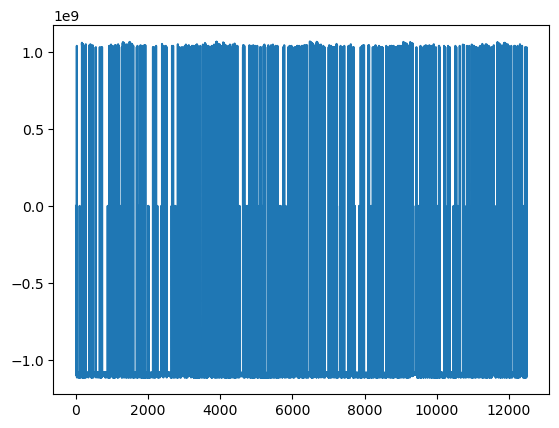

In [4]:
x = np.linspace(0, len(array2), len(array2))

plt.plot(x,array2)
#plt.xlim([0,1000])

In [1]:
fileName = 'test_data.bin'

file = open(fileName, 'rb')
data = []

In [2]:



wdtype = np.dtype([
        ('Event number', np.uint32), 
        ('Timestamp', np.uint64), 
        ('Samples', np.uint32), 
        ('Sampling Period', np.uint64), 
        #('Channels', np.int32),     # this is removed if 'one file per channel' is selected
        ('data', np.float32, (12500,)),
        ])

NameError: name 'np' is not defined

In [12]:
data = np.fromfile(file, dtype=wdtype)

In [13]:
print(len(data))
print(len(data[0]))

0


IndexError: index 0 is out of bounds for axis 0 with size 0

In [10]:
print(data[0])

(0, 94024, 12500, 8, 0, [-5.760e-01, -3.840e-01, -6.400e-01, ..., -3.200e-01, -2.560e-01,  1.401e-45])


In [9]:
channel_no = 1
q = [[(data[j][0], 0, list(data[j])[-i:][0]) for i in reversed(range(1, channel_no+1))] for j in range(len(data))]
print(q[2])

[(0, 0, array([0.00000e+00, 6.40000e-02, 6.40000e-02, ..., 4.20390e-45,
       6.56999e-40, 0.00000e+00], dtype=float32))]


In [7]:
print(len(data[0][4]))

12500


In [8]:
if not isinstance(data[0][4], np.ndarray):
    channels = data[0][4]
    print(f"number of channels {channels}")
    print(channels.type)
else:
    print("channels detected as np array")
    channels = 1

channels detected as np array


In [9]:
print(len(data[0]))
print(len(datathree))

5


NameError: name 'datathree' is not defined

In [29]:
testing_1chan = [[data[i][-chan] for chan in reversed(range(1,channels + 1))] for i in range(len(data))]

event_information = [[data[i][info] for info in range(0,4)] for i in range(len(data))]


In [31]:
#print(event_information[0][0].type)
print(testing_1chan)

[[array([ 0.   , -0.576, -0.384, ..., -0.384, -0.32 , -0.256], dtype=float32)], [array([-0.512, -0.768, -0.192, ..., -0.704, -0.384, -0.512], dtype=float32)], [array([-0.256, -0.384, -0.128, ..., -0.064, -0.384, -0.32 ], dtype=float32)], [array([-0.768, -0.768, -0.576, ..., -0.448, -0.576, -0.384], dtype=float32)], [array([-0.832, -0.64 , -0.704, ..., -0.256, -0.192, -0.128], dtype=float32)], [array([-0.512, -0.256, -0.384, ..., -0.448, -0.128, -0.192], dtype=float32)], [array([-0.64 , -0.576, -0.576, ..., -0.384, -0.64 , -0.576], dtype=float32)], [array([-0.576, -0.96 , -1.344, ..., -0.704, -0.576, -0.448], dtype=float32)], [array([-0.576, -0.704, -0.448, ..., -0.192, -0.192, -0.192], dtype=float32)], [array([-0.384, -0.704, -0.32 , ..., -0.256, -0.064, -0.704], dtype=float32)], [array([-0.576, -0.768, -0.576, ..., -0.192,  0.   , -0.192], dtype=float32)], [array([-0.704, -0.512, -0.256, ..., -0.576, -0.896, -0.64 ], dtype=float32)], [array([-0.704, -0.512, -0.704, ..., -0.32 , -0.384

In [25]:
list(wdtype.names)

['Event number', 'Timestamp', 'Samples', 'Sampling Period', 'data']

In [21]:
print(wdtype)
fields = wdtype.descr[:-1]
new_dtype = np.dtype(fields)
print(new_dtype)

[('Event number', '<u4'), ('Timestamp', '<u8'), ('Samples', '<u4'), ('Sampling Period', '<u8'), ('data', '<f4', (12500,))]
[('Event number', '<u4'), ('Timestamp', '<u8'), ('Samples', '<u4'), ('Sampling Period', '<u8')]


In [14]:
for n, d in enumerate(event_information):
    print(n)
    print(d)
    break

0
[0, 94024, 12500, 8]


In [54]:
print(testing[2])

[array([ 0.128,  0.064,  0.32 , -0.32 ,  0.   , -0.064,  0.256,  0.384,
        0.   ,  0.   , -0.128, -0.32 , -0.128,  0.128,  0.256,  0.704,
        0.512,  0.384,  0.128, -0.064,  0.256, -0.064,  0.064, -0.064,
        0.32 ,  0.128,  0.   , -0.192, -0.064,  0.192,  0.   , -0.32 ,
        0.   , -0.32 , -0.704, -0.576,  0.192, -0.064,  0.   , -0.192,
        0.128, -0.32 ,  0.32 , -0.192,  0.   , -0.32 ,  0.192, -0.32 ,
        0.128,  0.256,  0.256,  0.192,  0.256, -0.064,  0.192,  0.192,
        0.256,  0.128,  0.   , -0.32 ,  0.064, -0.064, -0.128, -0.064,
        0.192,  0.768,  0.32 ,  0.192,  0.256,  0.192,  0.   , -0.256,
        0.   , -0.128,  0.064,  0.32 ,  0.256,  0.064,  0.128, -0.064,
        0.   , -0.32 ,  0.32 ,  0.192,  0.32 ,  0.448,  0.128,  0.128,
        0.256,  0.512,  0.384,  0.384,  0.32 , -0.064,  0.256,  0.128,
        0.256,  0.448,  0.32 ,  0.32 ,  0.32 ,  0.32 ,  0.192,  0.256,
        0.   , -0.192,  0.32 ,  0.256,  0.256,  0.512,  0.32 ,  0.704,
     

In [40]:
print(event_information[:-3])
e_dtype = np.dtype(wdtype.descr[:-1])
df = pd.DataFrame(event_information, columns=e_dtype.names)
df_data = pd.DataFrame(testing)

[[0, 94024, 12500, 8], [1, 219046, 12500, 8], [2, 343935, 12500, 8], [3, 468850, 12500, 8], [4, 593825, 12500, 8], [5, 718788, 12500, 8], [6, 844100, 12500, 8], [7, 968898, 12500, 8], [8, 1093882, 12500, 8], [10, 1218898, 12500, 8], [11, 1343944, 12500, 8], [12, 1468945, 12500, 8], [13, 1593840, 12500, 8], [14, 1719034, 12500, 8], [15, 1843898, 12500, 8], [16, 1968927, 12500, 8], [17, 2094020, 12500, 8], [20, 2218934, 12500, 8], [22, 2344008, 12500, 8], [23, 2468883, 12500, 8], [25, 2593823, 12500, 8], [26, 2718892, 12500, 8], [28, 2843896, 12500, 8], [30, 2968919, 12500, 8], [32, 3093950, 12500, 8], [34, 3218919, 12500, 8], [35, 3343866, 12500, 8], [37, 3468964, 12500, 8], [38, 3594030, 12500, 8], [39, 3718969, 12500, 8], [41, 3843983, 12500, 8], [43, 3968803, 12500, 8], [46, 4093964, 12500, 8], [48, 4218995, 12500, 8], [50, 4343970, 12500, 8], [52, 4468897, 12500, 8], [53, 4593937, 12500, 8], [55, 4718981, 12500, 8], [56, 4843837, 12500, 8], [57, 4968959, 12500, 8], [58, 5093882, 125

In [48]:
print(df_data.iloc[0])

0    [0.512, 0.128, 0.512, 0.128, 0.576, 0.448, 0.0...
Name: 0, dtype: object


In [42]:
print(df)
print(df_data)
display(df_data)

    Event number  Timestamp  Samples  Sampling Period
0              0      94024    12500                8
1              1     219046    12500                8
2              2     343935    12500                8
3              3     468850    12500                8
4              4     593825    12500                8
..           ...        ...      ...              ...
95           116   11968803    12500                8
96           117   12093904    12500                8
97           118   12218787    12500                8
98           119   12344018    12500                8
99           120   12468958    12500                8

[100 rows x 4 columns]
                                                    0
0   [0.512, 0.128, 0.512, 0.128, 0.576, 0.448, 0.0...
1   [-0.064, 0.32, -0.064, 0.256, 0.128, 0.256, 0....
2   [0.128, 0.064, 0.32, -0.32, 0.0, -0.064, 0.256...
3   [0.256, 0.256, 0.064, 0.0, -0.128, -0.448, 0.1...
4   [0.128, 0.192, 0.32, 0.64, 0.704, 0.256, 0.192...
..  

,0
0,"[0.512, 0.128, 0.512, 0.128, 0.576, 0.448, 0.0..."
1,"[-0.064, 0.32, -0.064, 0.256, 0.128, 0.256, 0...."
2,"[0.128, 0.064, 0.32, -0.32, 0.0, -0.064, 0.256..."
3,"[0.256, 0.256, 0.064, 0.0, -0.128, -0.448, 0.1..."
4,"[0.128, 0.192, 0.32, 0.64, 0.704, 0.256, 0.192..."
...,...
77,"[-0.064, 0.0, 0.256, 0.128, -0.192, 0.0, -0.19..."
78,"[0.32, 0.256, 0.256, 0.64, 0.32, 0.192, 0.32, ..."
79,"[0.128, 0.064, 0.32, 0.128, 0.192, -0.128, 0.0..."
80,"[0.32, 0.064, 0.064, 0.576, 0.064, 0.256, -0.3..."


In [229]:
print(len(testing_1chan[0][0]))
print(testing_1chan[2][0])

12500
[-0.256 -0.384 -0.128 ... -0.064 -0.384 -0.32 ]


In [32]:
print(testing_1chan[0][0])
print(testing[0][0][:4], testing[0][1][:4], testing[0][2][:4])
print(np.array(testing)[0][0])

[ 0.    -0.576 -0.384 ... -0.384 -0.32  -0.256]


NameError: name 'testing' is not defined

you then need to separate each section appropriately to be dataframe'd

In [195]:
for i in range(0,4):
    print(i)

0
1
2
3


In [180]:
print(data[0])
print(data[1])

#for i in range(0,100):
#    print(data[i])
#data[0][-1]
#print(data[0][4:])

(0, 94024, 12500, 8, [ 0.   , -0.576, -0.384, ..., -0.384, -0.32 , -0.256])
(1, 219046, 12500, 8, [-0.512, -0.768, -0.192, ..., -0.704, -0.384, -0.512])


In [15]:
df = pd.DataFrame(data, columns = e_dtype.names)

ValueError: Data must be 1-dimensional, got ndarray of shape (99, 12500) instead

In [12]:
display(df)

,Event number,Timestamp,Samples,Sampling Period,Channels,data


### lets try making the header reader dynamic

In [8]:
import struct

fileName = 'test_data.bin'


# Define the fixed part of the header: uint32, uint64, uint32, uint64
fixed_header_dtype = np.dtype([
    ('uint32_1', np.uint32),
    ('uint64_1', np.uint64),
    ('uint32_2', np.uint32),
    ('uint64_2', np.uint64)
])

    # Define the optional signed int64
optional_header_dtype = np.dtype([
    ('int64_optional', np.int32)
])

with open(fileName, 'rb') as f:
    fixed_header = np.fromfile(f, dtype=fixed_header_dtype, count=1)
    print("Fixed header values:")
    print(fixed_header)

    # Check if there's enough data left for the optional int64
    optional_data = f.read(optional_header_dtype.itemsize)

    if len(optional_data) == optional_header_dtype.itemsize:
        # If we successfully read 8 bytes, interpret it as the optional int64
        f.seek(-optional_header_dtype.itemsize, 1)  # Move back to the start of the optional field
        optional_header = np.fromfile(f, dtype=optional_header_dtype, count=1)
        print("Optional signed int64:", optional_header['int64_optional'][0])
        header_size = fixed_header_dtype.itemsize + optional_header_dtype.itemsize
    else:
        print("No optional signed int64 found.")
        optional_header = None
        header_size = fixed_header_dtype.itemsize

Fixed header values:
[(0, 94024, 12500, 8)]
Optional signed int64: 0


In [60]:
file.close()

In [77]:
fileNamethree = 'three_channels.bin'

filethree = open(fileNamethree, 'rb')
datathree = []

In [78]:
import numpy as np
wdtypethree = np.dtype([
        ('Event number', np.uint32), 
        ('Timestamp', np.uint64), 
        ('Samples', np.uint32), 
        ('Sampling Period', np.uint64), 
        ('Channels', np.int32),     # this is removed if 'one file per channel' is selected
        ('data1', np.float32, (1000,)),
        ('data2', np.float32, (1000,)),
        ('data3', np.float32, (1000,)),
        ])

print(wdtypethree)
'''wdtypethree = np.dtype([
        ('Event number', np.uint32), 
        ('Timestamp', np.uint64), 
        ('Samples', np.uint32), 
        ('Sampling Period', np.uint64), 
        ('Channels', np.int32),     # this is removed if 'one file per channel' is selected
        ] + [(f'channel_{i+1}', np.float32, (1000,)) for i in range(0,3)])
print(wdtypethree)'''

[('Event number', '<u4'), ('Timestamp', '<u8'), ('Samples', '<u4'), ('Sampling Period', '<u8'), ('Channels', '<i4'), ('data1', '<f4', (1000,)), ('data2', '<f4', (1000,)), ('data3', '<f4', (1000,))]


"wdtypethree = np.dtype([\n        ('Event number', np.uint32), \n        ('Timestamp', np.uint64), \n        ('Samples', np.uint32), \n        ('Sampling Period', np.uint64), \n        ('Channels', np.int32),     # this is removed if 'one file per channel' is selected\n        ] + [(f'channel_{i+1}', np.float32, (1000,)) for i in range(0,3)])\nprint(wdtypethree)"

In [79]:
datathree = np.fromfile(filethree, dtype=wdtypethree)

In [80]:
print(len(datathree))
for i in range(1, 4):
    print(i)
print("")
for i in range(1, 2):
    print(i)

print("")
for i in reversed(range(1, 4)):
    print(i)
print("")


82
1
2
3

1

3
2
1



In [13]:
channels = 3
print((wdtypethree.descr[0],wdtypethree.descr[-(channels+1)],wdtypethree.descr[-channels:]))

(('Event number', '<u4'), ('Channels', '<i4'), [('data1', '<f4', (1000,)), ('data2', '<f4', (1000,)), ('data3', '<f4', (1000,))])


In [10]:
new_type = np.dtype[(wdtypethree.descr[0],wdtypethree.descr[-2],wdtypethree.descr[-1])]
print(new_type)

TypeError: Too many arguments for numpy.dtype

In [ ]:
rwf_dtype = np.dtype([
        ('event_number', np.uint32), 
        ('channels', np.int32),
        ('rwf', np.float32, (samples,))
])

In [5]:
print(len(datathree))

82


In [73]:
channel_no = 3

#print(datathree[0])
#print(list(datathree[0])[-channel_no:])

# create new list that consists of: event number, channel number, waveform in rest of data.

q = [[(datathree[j][0], datathree[j][4] - i, list(datathree[j])[-i:][0]) for i in reversed(range(1, channel_no+1))] for j in range(len(datathree))]
print("================================")
print(len(q[1][1][2]))

1000


In [74]:
print(len(q[0]))
print(q[0])

3
[(0, 0, array([ 0.   , -0.384,  0.192, -0.384, -0.256, -0.512, -0.064, -0.32 ,
        0.064, -0.128,  0.128,  0.512,  0.128, -0.064,  0.128,  0.   ,
        0.192, -0.192,  0.   , -0.32 ,  0.256, -0.32 ,  0.256, -0.064,
        0.   ,  0.192, -0.128, -0.128,  0.192, -0.128,  0.512,  0.32 ,
        0.256,  0.   ,  0.32 , -0.128,  0.192, -0.128,  0.192, -0.128,
       -0.064, -0.064,  0.   , -0.448, -0.192, -0.128,  0.256, -0.32 ,
        0.   , -0.576, -0.256, -0.256,  0.32 , -0.128,  0.   ,  0.064,
        0.384, -0.192, -0.064,  0.064,  0.512,  0.192,  0.256,  0.32 ,
        0.32 , -0.064,  0.32 , -0.128, -0.064, -0.512, -0.192, -0.256,
        0.   , -0.32 , -0.256, -0.384, -0.128, -0.064,  0.   ,  0.   ,
        0.128, -0.128,  0.256, -0.064, -0.064, -0.192,  0.512, -0.064,
        0.256,  0.32 ,  0.128,  0.   ,  0.192,  0.   , -0.128, -0.576,
       -0.192, -0.384,  0.   ,  0.   ,  0.128, -0.128,  0.64 , -0.064,
        0.256,  0.192,  0.128, -0.512, -0.512, -0.704,  0.   , -0.1

In [249]:



event_information = [[datathree[i][info] for info in range(0,5)] for i in range(len(datathree))]
#event_information = [[list(datathree[i])[info].item() for info in range(0,5)] for i in range(len(datathree))]

In [252]:
print(event_information[:5])

[[0, 1998268, 1000, 8, 3], [1, 67506435, 1000, 8, 3], [2, 132498360, 1000, 8, 3], [3, 195997406, 1000, 8, 3], [4, 257998463, 1000, 8, 3]]


In [254]:
print(wdtype.descr[4:])
#x = [print(event_information[i]) for i in range(len(event_information)) if event_information[i][0] == 50]

[('data', '<f4', (12500,))]


In [227]:
print(type(event_information))
print(len(event_information), len(event_information[0]))

<class 'list'>
82 5


In [209]:
print(type(event_information[0][0]))
#print(type(event_information[0][0].item()))
#print(event_information[0][1].type())
#print(event_information[0][2].type())
#print(event_information[0][3].type())
#print(event_information[0][4].type())
print(converted_data)

<class 'numpy.uint32'>
[[0, 1998268, 1000, 8, 3], [1, 67506435, 1000, 8, 3], [2, 132498360, 1000, 8, 3], [3, 195997406, 1000, 8, 3], [4, 257998463, 1000, 8, 3], [5, 320505979, 1000, 8, 3], [6, 383497026, 1000, 8, 3], [7, 445497098, 1000, 8, 3], [8, 507496928, 1000, 8, 3], [9, 570497289, 1000, 8, 3], [10, 632997863, 1000, 8, 3], [11, 695497200, 1000, 8, 3], [12, 758496152, 1000, 8, 3], [13, 820997020, 1000, 8, 3], [14, 882496907, 1000, 8, 3], [15, 945995966, 1000, 8, 3], [16, 1007999656, 1000, 8, 3], [17, 1070504581, 1000, 8, 3], [18, 1132996098, 1000, 8, 3], [19, 1195996239, 1000, 8, 3], [20, 1257496495, 1000, 8, 3], [21, 1320996727, 1000, 8, 3], [22, 1382496872, 1000, 8, 3], [23, 1445496323, 1000, 8, 3], [24, 1507995753, 1000, 8, 3], [25, 1570996597, 1000, 8, 3], [26, 1632495785, 1000, 8, 3], [27, 1695994820, 1000, 8, 3], [28, 1757495935, 1000, 8, 3], [29, 1820507051, 1000, 8, 3], [30, 1882995585, 1000, 8, 3], [31, 1945994537, 1000, 8, 3], [32, 2007497118, 1000, 8, 3], [33, 2070995360

In [212]:
# Define a structured dtype that matches the data layout
structured_dtype = np.dtype([
    ('event_number', int),
    ('timestamp', int),
    ('samples', int),
    ('sampling_period', int),
    ('channel_id', int)
])

In [257]:
event_information = list(map(tuple, event_information))
structured_array = np.array(event_information, dtype=structured_dtype)

# Flatten the array
print(structured_array)

[( 0,    1998268, 1000, 8, 3) ( 1,   67506435, 1000, 8, 3)
 ( 2,  132498360, 1000, 8, 3) ( 3,  195997406, 1000, 8, 3)
 ( 4,  257998463, 1000, 8, 3) ( 5,  320505979, 1000, 8, 3)
 ( 6,  383497026, 1000, 8, 3) ( 7,  445497098, 1000, 8, 3)
 ( 8,  507496928, 1000, 8, 3) ( 9,  570497289, 1000, 8, 3)
 (10,  632997863, 1000, 8, 3) (11,  695497200, 1000, 8, 3)
 (12,  758496152, 1000, 8, 3) (13,  820997020, 1000, 8, 3)
 (14,  882496907, 1000, 8, 3) (15,  945995966, 1000, 8, 3)
 (16, 1007999656, 1000, 8, 3) (17, 1070504581, 1000, 8, 3)
 (18, 1132996098, 1000, 8, 3) (19, 1195996239, 1000, 8, 3)
 (20, 1257496495, 1000, 8, 3) (21, 1320996727, 1000, 8, 3)
 (22, 1382496872, 1000, 8, 3) (23, 1445496323, 1000, 8, 3)
 (24, 1507995753, 1000, 8, 3) (25, 1570996597, 1000, 8, 3)
 (26, 1632495785, 1000, 8, 3) (27, 1695994820, 1000, 8, 3)
 (28, 1757495935, 1000, 8, 3) (29, 1820507051, 1000, 8, 3)
 (30, 1882995585, 1000, 8, 3) (31, 1945994537, 1000, 8, 3)
 (32, 2007497118, 1000, 8, 3) (33, 2070995360, 1000, 8, 

In [247]:
print(unique_data)

[(0, 0, 0, 0, 0), (1998268, 1998268, 1998268, 1998268, 1998268), (1000, 1000, 1000, 1000, 1000), (8, 8, 8, 8, 8), (3, 3, 3, 3, 3), (1, 1, 1, 1, 1), (67506435, 67506435, 67506435, 67506435, 67506435), (2, 2, 2, 2, 2), (132498360, 132498360, 132498360, 132498360, 132498360), (195997406, 195997406, 195997406, 195997406, 195997406), (4, 4, 4, 4, 4), (257998463, 257998463, 257998463, 257998463, 257998463), (5, 5, 5, 5, 5), (320505979, 320505979, 320505979, 320505979, 320505979), (6, 6, 6, 6, 6), (383497026, 383497026, 383497026, 383497026, 383497026), (7, 7, 7, 7, 7), (445497098, 445497098, 445497098, 445497098, 445497098), (507496928, 507496928, 507496928, 507496928, 507496928), (9, 9, 9, 9, 9), (570497289, 570497289, 570497289, 570497289, 570497289), (10, 10, 10, 10, 10), (632997863, 632997863, 632997863, 632997863, 632997863), (11, 11, 11, 11, 11), (695497200, 695497200, 695497200, 695497200, 695497200), (12, 12, 12, 12, 12), (758496152, 758496152, 758496152, 758496152, 758496152), (13, 

In [158]:
display(qqq)

,Event number,Timestamp,Samples,Sampling Period,data
0,0,1998268,1000,8,3
1,1,67506435,1000,8,3
2,2,132498360,1000,8,3
3,3,195997406,1000,8,3
4,4,257998463,1000,8,3
...,...,...,...,...,...
77,77,4820499947,1000,8,3
78,78,4882990612,1000,8,3
79,79,4945989984,1000,8,3
80,80,5007490783,1000,8,3


In [157]:
qqq = pd.DataFrame(event_information, columns=wdtype.names[:5])

In [159]:
qqq.to_hdf("test_notebook.h5", key="event_info", mode="w")

In [155]:
print(event_information)

with h5py.File('test_notebook.h5', 'w') as h5f:

    evt_info = h5f.create_dataset('event_info', data = event_information)
    evt_info.attrs['column_names'] = e_dtype.names

[[0, 1998268, 1000, 8, 3], [1, 67506435, 1000, 8, 3], [2, 132498360, 1000, 8, 3], [3, 195997406, 1000, 8, 3], [4, 257998463, 1000, 8, 3], [5, 320505979, 1000, 8, 3], [6, 383497026, 1000, 8, 3], [7, 445497098, 1000, 8, 3], [8, 507496928, 1000, 8, 3], [9, 570497289, 1000, 8, 3], [10, 632997863, 1000, 8, 3], [11, 695497200, 1000, 8, 3], [12, 758496152, 1000, 8, 3], [13, 820997020, 1000, 8, 3], [14, 882496907, 1000, 8, 3], [15, 945995966, 1000, 8, 3], [16, 1007999656, 1000, 8, 3], [17, 1070504581, 1000, 8, 3], [18, 1132996098, 1000, 8, 3], [19, 1195996239, 1000, 8, 3], [20, 1257496495, 1000, 8, 3], [21, 1320996727, 1000, 8, 3], [22, 1382496872, 1000, 8, 3], [23, 1445496323, 1000, 8, 3], [24, 1507995753, 1000, 8, 3], [25, 1570996597, 1000, 8, 3], [26, 1632495785, 1000, 8, 3], [27, 1695994820, 1000, 8, 3], [28, 1757495935, 1000, 8, 3], [29, 1820507051, 1000, 8, 3], [30, 1882995585, 1000, 8, 3], [31, 1945994537, 1000, 8, 3], [32, 2007497118, 1000, 8, 3], [33, 2070995360, 1000, 8, 3], [34, 213

In [76]:
import pandas as pd

def flatten(xss):
    return [x for xs in xss for x in xs]




dtype_flat = np.dtype([
            ('event_number', np.uint32), 
            ('channel_no', np.int32),
            ('rwf', np.float32, (1000,))
        ])

q_flat = np.array(flatten(q), dtype = dtype_flat)
print(q_flat[0])
#pd_flat = pd.DataFrame(q_flat, dtype = dtype_flat)
# write event information
with h5py.File('test_notebook.h5', 'w') as h5f:

    h5f.create_dataset('raw_wf', data=q_flat)

(0, 0, [ 0.   , -0.384,  0.192, -0.384, -0.256, -0.512, -0.064, -0.32 ,  0.064, -0.128,  0.128,  0.512,  0.128, -0.064,  0.128,  0.   ,  0.192, -0.192,  0.   , -0.32 ,  0.256, -0.32 ,  0.256, -0.064,  0.   ,  0.192, -0.128, -0.128,  0.192, -0.128,  0.512,  0.32 ,  0.256,  0.   ,  0.32 , -0.128,  0.192, -0.128,  0.192, -0.128, -0.064, -0.064,  0.   , -0.448, -0.192, -0.128,  0.256, -0.32 ,  0.   , -0.576, -0.256, -0.256,  0.32 , -0.128,  0.   ,  0.064,  0.384, -0.192, -0.064,  0.064,  0.512,  0.192,  0.256,  0.32 ,  0.32 , -0.064,  0.32 , -0.128, -0.064, -0.512, -0.192, -0.256,  0.   , -0.32 , -0.256, -0.384, -0.128, -0.064,  0.   ,  0.   ,  0.128, -0.128,  0.256, -0.064, -0.064, -0.192,  0.512, -0.064,  0.256,  0.32 ,  0.128,  0.   ,  0.192,  0.   , -0.128, -0.576, -0.192, -0.384,  0.   ,  0.   ,  0.128, -0.128,  0.64 , -0.064,  0.256,  0.192,  0.128, -0.512, -0.512, -0.704,  0.   , -0.128,  0.32 ,  0.192,  0.192, -0.064,  0.256, -0.256,  0.256, -0.064,  0.192, -0.256,  0.064, -0.32 , 

In [48]:
file = open('test_data.bin', 'rb')
data = np.fromfile(file, dtype=wdtype)
file.close()

In [52]:
with open('test_data.bin', 'rb') as f:
    data_with = np.fromfile(f, dtype=wdtype)

print(data == data_with)
print(data[52])
print(data_with[52])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
(71, 6593930, 12500, 8, [-0.384, -0.384, -0.32 , ..., -0.576, -0.064,  0.064])
(71, 6593930, 12500, 8, [-0.384, -0.384, -0.32 , ..., -0.576, -0.064,  0.064])


In [39]:
display(pd_flat)

,event_number,channels,rwf
0,0,0,"[0.0, -0.384, 0.192, -0.384, -0.256, -0.512, -..."
1,0,1,"[-0.256, 0.448, 0.32, 0.128, -0.64, -0.32, -0...."
2,0,2,"[0.512, 0.128, 0.512, 0.128, 0.576, 0.448, 0.0..."
3,1,0,"[-0.128, -0.128, -0.128, 0.448, 0.32, 0.32, 0...."
4,1,1,"[-0.064, -0.448, -0.384, -0.704, -0.576, -0.12..."
...,...,...,...
241,80,1,"[-0.064, -0.384, -0.64, -0.256, -0.256, -0.384..."
242,80,2,"[0.32, 0.064, 0.064, 0.576, 0.064, 0.256, -0.3..."
243,81,0,"[0.192, 0.256, 0.256, 0.256, 0.192, 0.256, -0...."
244,81,1,"[-0.256, -0.384, -0.064, -0.256, -0.256, -0.38..."


In [63]:
print(pd_flat.rwf)

0      [0.0, -0.384, 0.192, -0.384, -0.256, -0.512, -...
1      [-0.256, 0.448, 0.32, 0.128, -0.64, -0.32, -0....
2      [0.512, 0.128, 0.512, 0.128, 0.576, 0.448, 0.0...
3      [-0.128, -0.128, -0.128, 0.448, 0.32, 0.32, 0....
4      [-0.064, -0.448, -0.384, -0.704, -0.576, -0.12...
                             ...                        
241    [-0.064, -0.384, -0.64, -0.256, -0.256, -0.384...
242    [0.32, 0.064, 0.064, 0.576, 0.064, 0.256, -0.3...
243    [0.192, 0.256, 0.256, 0.256, 0.192, 0.256, -0....
244    [-0.256, -0.384, -0.064, -0.256, -0.256, -0.38...
245    [0.32, 0.256, 0.32, 0.32, 0.256, 0.448, -0.064...
Name: rwf, Length: 246, dtype: object


In [1]:
import h5py

# write event information
with h5py.File('save_path.h5', 'w') as h5f:
    h5f.create_dataset('raw_wf', data=np.array(pd_flat['rwf']).to_list())

NameError: name 'np' is not defined

In [66]:
import matplotlib.pyplot as plt

print(datathree[0])
print("")
#print(datathree[1])



testing = [[datathree[i][-chan] for chan in reversed(range(1,channels + 1))] for i in range(len(datathree))]
#print(testing[0][0][:3])
#print(datathree[0][-3][:3])
#print(testing[0][1][:3])
#print(datathree[0][-2][:3])

#print(testing[0][2][:3])
#print(datathree[0][-1][:3])
#x = np.linspace(0, 1000, 1000)
#plt.plot(x,datathree[1][:-3])

(0, 1998268, 1000, 8, 3, [ 0.   , -0.384,  0.192, -0.384, -0.256, -0.512, -0.064, -0.32 ,  0.064, -0.128,  0.128,  0.512,  0.128, -0.064,  0.128,  0.   ,  0.192, -0.192,  0.   , -0.32 ,  0.256, -0.32 ,  0.256, -0.064,  0.   ,  0.192, -0.128, -0.128,  0.192, -0.128,  0.512,  0.32 ,  0.256,  0.   ,  0.32 , -0.128,  0.192, -0.128,  0.192, -0.128, -0.064, -0.064,  0.   , -0.448, -0.192, -0.128,  0.256, -0.32 ,  0.   , -0.576, -0.256, -0.256,  0.32 , -0.128,  0.   ,  0.064,  0.384, -0.192, -0.064,  0.064,  0.512,  0.192,  0.256,  0.32 ,  0.32 , -0.064,  0.32 , -0.128, -0.064, -0.512, -0.192, -0.256,  0.   , -0.32 , -0.256, -0.384, -0.128, -0.064,  0.   ,  0.   ,  0.128, -0.128,  0.256, -0.064, -0.064, -0.192,  0.512, -0.064,  0.256,  0.32 ,  0.128,  0.   ,  0.192,  0.   , -0.128, -0.576, -0.192, -0.384,  0.   ,  0.   ,  0.128, -0.128,  0.64 , -0.064,  0.256,  0.192,  0.128, -0.512, -0.512, -0.704,  0.   , -0.128,  0.32 ,  0.192,  0.192, -0.064,  0.256, -0.256,  0.256, -0.064,  0.192, -0.256

In [71]:
datathree[0][-1]

array([ 0.512,  0.128,  0.512,  0.128,  0.576,  0.448,  0.   , -0.32 ,
        0.32 ,  0.064,  0.32 ,  0.256,  0.256,  0.   ,  0.064, -0.192,
        0.192, -0.064,  0.256, -0.192,  0.128, -0.192,  0.192,  0.064,
        0.128, -0.064,  0.512,  0.32 ,  0.32 , -0.064,  0.   ,  0.192,
        0.32 ,  0.064,  0.064,  0.064,  0.384, -0.192, -0.256,  0.064,
        0.512,  0.064,  0.128, -0.704,  0.   ,  0.064,  0.256, -0.192,
        0.128, -0.064,  0.448,  0.064,  0.192, -0.384, -0.128, -0.064,
        0.448,  0.32 ,  0.256,  0.512,  0.512,  0.32 ,  0.32 ,  0.32 ,
        0.832,  0.128,  0.   ,  0.128, -0.384, -0.704, -0.064,  0.064,
        0.32 ,  0.384,  0.32 , -0.064,  0.32 , -0.128,  0.128, -0.064,
        0.192, -0.384, -0.192,  0.064,  0.192, -0.32 ,  0.128,  0.256,
        0.32 ,  0.384,  0.128, -0.192,  0.   ,  0.384,  0.256,  0.256,
        0.384,  0.128, -0.384, -0.192, -0.064, -0.448, -0.128, -0.064,
        0.256,  0.064,  0.64 ,  0.384,  0.512,  0.704,  0.384,  0.064,
      

In [115]:
#datathree[1][1] - datathree[0][1]
print(f'{datathree[1][1]}, {datathree[0][1]}, {datathree[1][1] - datathree[0][1]}, {datathree[2][1] - datathree[1][1]}')

67506435, 1998268, 65508167, 64991925


In [ ]:
#def collect_header_info(file):
    

def check_header(file_path):
    '''
    Annoyingly, WaveDump2 allows for varying header size. 
    We can check if the dataframe is the same in a less-hacky way by scanning through the headers and ensuring that:
        - the event number is consecutive
        - the number of samples and sampling periods are the same
        - the number of channels are the same
    
    Parameters
    ----------

    Returns
    -------
    The file format 
    '''
    try:
        file = open(file_path, 'rb')
    except Exception as e:
        print(f"The file path provided is incorrect!\n{file_path} doesn't exist.")
        print(e)
    
    


In [4]:
fileNamethree = 'three_channels.bin'

filethree = open(fileNamethree, 'rb')
datathree = []



### 

In [1]:
x = proc.generate_rwf_type(500)
print(x)

NameError: name 'proc' is not defined

In [60]:
def read_and_print(file, type = int, bytes = 4):
    '''
    open file, reading out binary X at a time, little endian atm for whatever reason
    '''
    x = file.read(bytes)
    print(x)
    print(type.from_bytes(x, byteorder='little'))

    return x
    

In [61]:
read_and_print(filethree, int, 4)
read_and_print(filethree, int, 8)
read_and_print(filethree, int, 4)
q = read_and_print(filethree, int, 8)
q = read_and_print(filethree, int, 4)

b'\x00\x00\x00\x00'
0
b'\xbc}\x1e\x00\x00\x00\x00\x00'
1998268
b'\xe8\x03\x00\x00'
1000
b'\x08\x00\x00\x00\x00\x00\x00\x00'
8
b'\x03\x00\x00\x00'
3


In [62]:
x = filethree.read(10)
print(x)

b'\x00\x00\x00\x00\xa6\x9b\xc4\xbe\xa6\x9b'


In [68]:
x = filethree.read(64)
print(x)

b'\x00\x00\x00\x00\xbc}\x1e\x00\x00\x00\x00\x00\xe8\x03\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\xa6\x9b\xc4\xbe\xa6\x9bD>\xa6\x9b\xc4\xbeo\x12\x83\xbeo\x12\x03\xbfo\x12\x83\xbd\n\xd7\xa3\xbeo\x12\x83='
